# Customer Churn Analysis

The task is to make a churn prediction model.

## Loading Dataset

In [1]:
# importing libraries
import pandas as pd   # for data wrangling

import numpy as np    # numerical python to handle arrays

import matplotlib.pyplot as plt    # library for data visualisation

import seaborn as sns     # seaborn library for data visualisation

import warnings      # this will detect unnecessary warnings
warnings.filterwarnings('ignore')  # to ignore unnecessary warnings

In [4]:
# loading dataset in pandas dataframe
churn = pd.read_csv('customer_churn_analysis.csv')

### Data Analysis

#### Shape

In [5]:
# First let's check the dataset shape
churn.shape

(7043, 21)

*The dataset contains 7043 rows and 21 columns.*

In [7]:
# as the dataset contains 21 columns so this will not show all columns when we load it
# setting option to display all columns
pd.set_option('display.max_columns', None)

# Now it will show all columns

In [8]:
# loading top 10 rows of dataset to get an overvier of it
churn.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


*Here customerID column contains unique value for every row so we can drop that column.*

#### Data Types

In [9]:
# let's check the data types of columns
churn.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

*Most of the column contains object data types while very few contains float data type. We will encode them but before that we can see the TotalCharges column showing object data type while we can see from the dataset it is having continues data type it means there is some mistake happen in entries so, we need to handle that.*

#### Null values

In [10]:
# checking for null values present in dataset
churn.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*Here it is showing 0 null values but, is it really true because we have seen the TotalCharges column contains continuous data type but here it is showing object data type so we will check for any blank space in that column because if there will be any blank space then it will count it as data but we know the blank space doesn't contains any data so it can be count as null.*

In [12]:
# first let's check unique values present in TotalCharges column
churn['TotalCharges'].nunique()

6531

*Here we can see there are total 7043 rows but here it has 6531 unique values and as it contains float values so the unique values should be equal to total rows or somewhere nearby that but here the difference is more and by analysing this a doubt is arising that it may consist some blank spaces i.e. null values in the dataset.*

In [19]:
# let's check if there is some blank space present in TotalCharges column
# using pandas loc method to find all rows which contains blank space in TotalCharges column.
churn.loc[churn['TotalCharges'] == ' ']

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,No,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,Yes,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


*Here we can see in these rows the TotalCharges column is blank it means there is blank space present in these values.*

#### Blank Space

*We need to handle these blank spaces so that these can show as null values and we will be able to fill them.*

In [20]:
# first we will make a copy of the dataset and perform all the tasks on that copied dataset
df = churn.copy()

In [21]:
# replacing these blank spaces with np.nan
df['TotalCharges'] = df['TotalCharges'].replace(' ', np.nan)

*The blank spaces is now replaces with nan values*

In [22]:
# let's check
df.isnull().sum()

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64

*Here we can see now it is showing the null values.*

In [23]:
# let's check the data type
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

*Here we can see the data type is still object and we have observed that it contains continues values so we need to handle that.*

#### Data Type

In [24]:
# Handling the data type of TotalCharges column
df['TotalCharges'] = df['TotalCharges'].astype(float)

*Now the data type of that column is converted to float.*

In [25]:
# let's check the data type 
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges        float64
Churn                object
dtype: object

*Here we can see now the data type is converted to float.*

#### Unique features

*Let's check how many unique features are present in every object data type column*

In [29]:
# first we will make a list of all object data type column
# we will use list concatenation to make the list
obj = [i for i in df.columns if df[i].dtype == 'O']

In [32]:
# now we will use for loop to find all unique features of every object data type column
for i in obj:
    uni = df[i].nunique()
    print('There are',uni,'unique values present in',i,'column.')

There are 7043 unique values present in customerID column.
There are 2 unique values present in gender column.
There are 2 unique values present in Partner column.
There are 2 unique values present in Dependents column.
There are 2 unique values present in PhoneService column.
There are 3 unique values present in MultipleLines column.
There are 3 unique values present in InternetService column.
There are 3 unique values present in OnlineSecurity column.
There are 3 unique values present in OnlineBackup column.
There are 3 unique values present in DeviceProtection column.
There are 3 unique values present in TechSupport column.
There are 3 unique values present in StreamingTV column.
There are 3 unique values present in StreamingMovies column.
There are 3 unique values present in Contract column.
There are 2 unique values present in PaperlessBilling column.
There are 4 unique values present in PaymentMethod column.
There are 2 unique values present in Churn column.


*Here we can clearly observe there are 7043 unique values present in customerID column and we know that the dataset contains same number of rows that means it is unique for every value and it will not give any insight for the prediction. Rest all columns only contains 2 to 4 unique values.*

#### Skewness

In [33]:
# Let's check skewness of numerical data
df.skew()

SeniorCitizen     1.833633
tenure            0.239540
MonthlyCharges   -0.220524
TotalCharges      0.961642
dtype: float64

*SeniorCitizen and TotalCharges column have some positive skewness we will analyse it graphically and do the necessary.*

#### Statistical Summary

In [34]:
# let's check the statistical summary of numerical columns
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7032.000000
mean,0.162147,32.371149,64.761692,2283.300441
std,0.368612,24.559481,30.090047,2266.771362
min,0.000000,0.000000,18.250000,18.800000
25%,0.000000,9.000000,35.500000,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.850000,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


Observations:
    
    1: There is huge difference between 75th percentile and maximum value that so it may chance of outliers.
        
    2: There is high standard deviation of data in all columns except SeniorCitizen.
    
    3: As there is null values present in TotalCharges column so it is showing some less total count.

In [37]:
# let's check the statistical summary of categorical columns
df.describe(include = ['O'])

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,5174


*Here every column is showing the total number of unique values present in that column the top and the frequency of that unique value in the dataset. Here we can see in our target column i.e. Churn there is total 5174 number of 'No' value present in that column and there are total 7043 Rows in the dataset that means it is a case of imbalance dataset.*

#### Imbalance dataset

In [41]:
# Let's check if there is imbalance of dataset
# we will use normalize method to find the total percentage of different unique value present in target column
df['Churn'].value_counts(normalize = True)*100

No     73.463013
Yes    26.536987
Name: Churn, dtype: float64

*Here we can see there is only 26% of 'Yes' value present in the dataset and more than 70% is biased towards 'No' so if we train our model with this dataset then it will get biased so we need to balance the dataset.*

#### Nominal data

*Now we will make a dataframe of only those columns which contains nominal data.*

In [42]:
# checking column names
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [43]:
# making dataframe of columns of nominal data
df_nominal = df[['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 
           'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 
           'PaperlessBilling','PaymentMethod', 'Churn']].copy()

In [46]:
# checking the top 5 rows of dataframe
df_nominal.head(10)

,gender,SeniorCitizen,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,Churn
0,Female,0,Yes,No,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,No
1,Male,0,No,No,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,No
2,Male,0,No,No,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,Yes
3,Male,0,No,No,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),No
4,Female,0,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,Yes
5,Female,0,No,No,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
6,Male,0,No,Yes,Yes,Yes,Fiber optic,No,Yes,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),No
7,Female,0,No,No,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,No,Mailed check,No
8,Female,0,Yes,No,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,Yes
9,Male,0,No,Yes,Yes,No,DSL,Yes,Yes,No,No,No,No,One year,No,Bank transfer (automatic),No


### Data Visualization

#### Total number of unique categories

In [50]:
# now we will see the total frequency of unique values in every categorical column
# first we will make a list of every categorical column

category = df_nominal.columns

Male      3555
Female    3488
Name: gender, dtype: int64


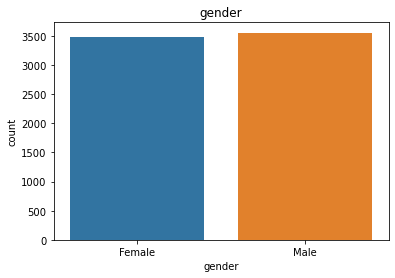





0    5901
1    1142
Name: SeniorCitizen, dtype: int64


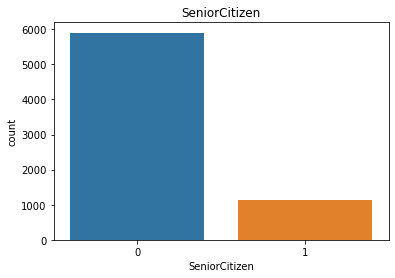





No     3641
Yes    3402
Name: Partner, dtype: int64


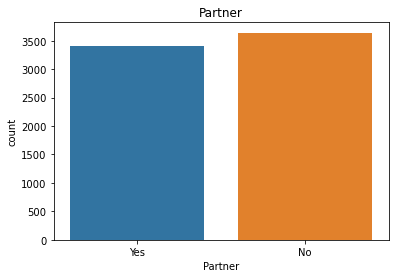





No     4933
Yes    2110
Name: Dependents, dtype: int64


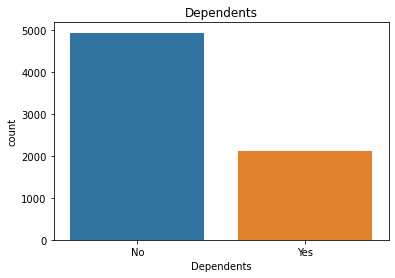





Yes    6361
No      682
Name: PhoneService, dtype: int64


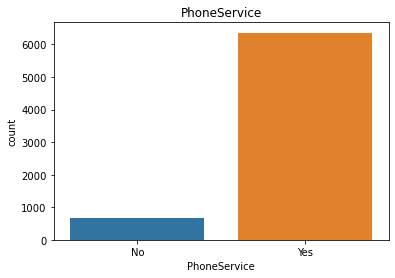





No                  3390
Yes                 2971
No phone service     682
Name: MultipleLines, dtype: int64


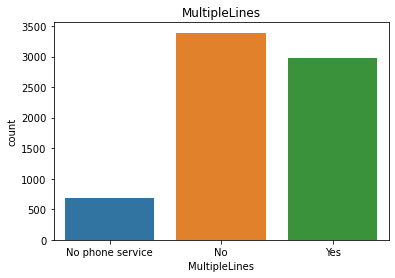





Fiber optic    3096
DSL            2421
No             1526
Name: InternetService, dtype: int64


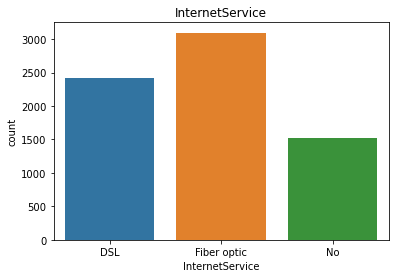





No                     3498
Yes                    2019
No internet service    1526
Name: OnlineSecurity, dtype: int64


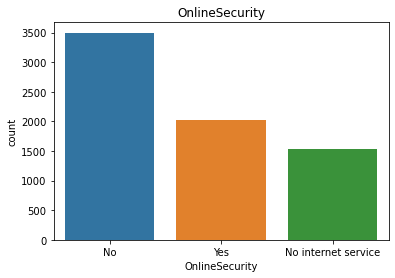





No                     3088
Yes                    2429
No internet service    1526
Name: OnlineBackup, dtype: int64


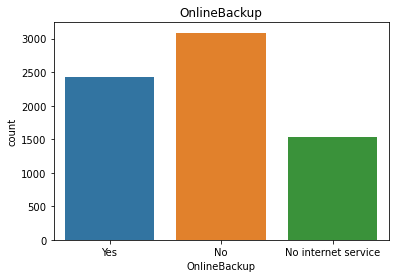





No                     3095
Yes                    2422
No internet service    1526
Name: DeviceProtection, dtype: int64


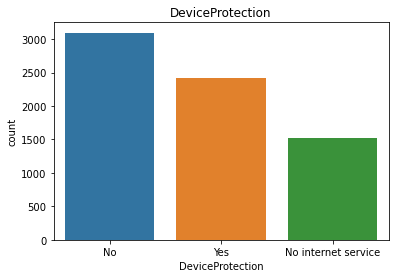





No                     3473
Yes                    2044
No internet service    1526
Name: TechSupport, dtype: int64


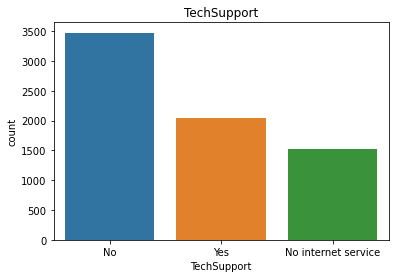





No                     2810
Yes                    2707
No internet service    1526
Name: StreamingTV, dtype: int64


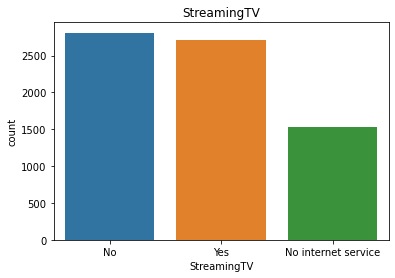





No                     2785
Yes                    2732
No internet service    1526
Name: StreamingMovies, dtype: int64


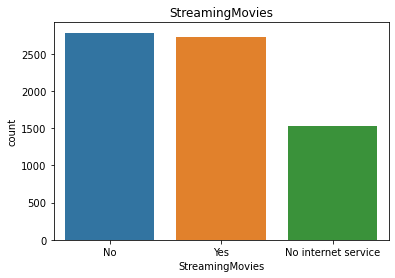





Month-to-month    3875
Two year          1695
One year          1473
Name: Contract, dtype: int64


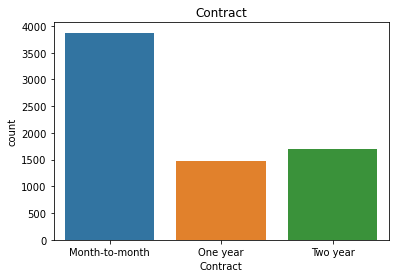





Yes    4171
No     2872
Name: PaperlessBilling, dtype: int64


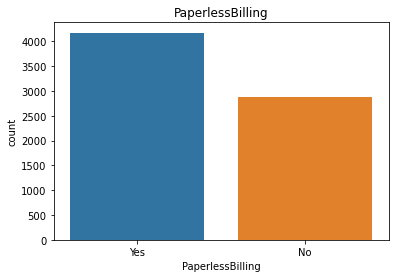





Electronic check             2365
Mailed check                 1612
Bank transfer (automatic)    1544
Credit card (automatic)      1522
Name: PaymentMethod, dtype: int64


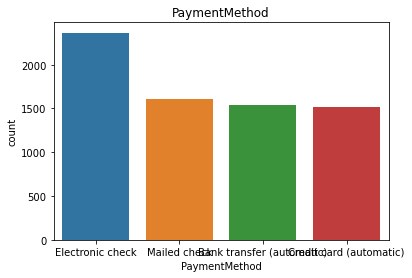





No     5174
Yes    1869
Name: Churn, dtype: int64


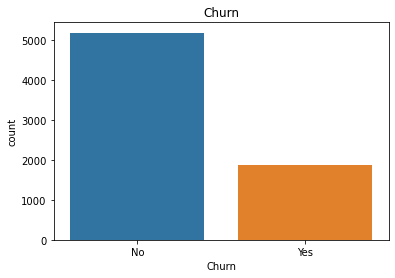

In [57]:
# we will use for loop to plot graph

# we will use countplot
# we will also see the total value counts
for i in category:
    print(df_nominal[i].value_counts())
    plt.title(i)
    sns.countplot(df[i])
    plt.show()
    print('\n')
    print('\n')

Observations:
    
    1: There are almost same number of male and female customers.
        
    2: There are very few senior citizen customers.
        
    3: Most of the customers have phone service.
        
    4: Most of the customers have month to month contract.
        
    5: Large number of customers make payment through electronic check.
        
    6: Most number of customers are not switching to a different service provider but a quite few are switching.

#### Distribution of numerical Data

In [63]:
# making a list of columns which contains continuous data
num = ['MonthlyCharges', 'TotalCharges']

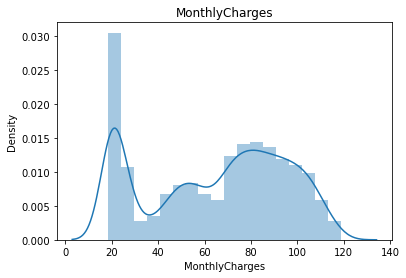

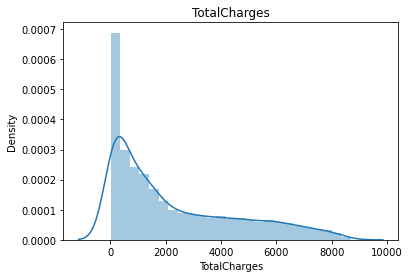

In [64]:
# checking distribution of these data
# we will use for loop and distplot to show the distribution
for i in num:
    plt.title(i)
    sns.distplot(df[i])
    plt.show()

*From here we can observe that the data in both column are skewed but the data in TotalCharges column is highly skewed.*

#### Relation between Monthly Charges and churn rate

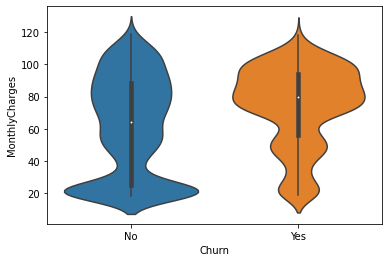

In [75]:
plt.xlabel('Churn')
plt.ylabel('MonthlyCharges')
sns.violinplot(x = 'Churn', y = 'MonthlyCharges', data = df)
plt.show()

*Most people monthly charges lies between 70 to 100 dollar who are switching to another service provider.*

#### Relation between Total charges and Churn rate

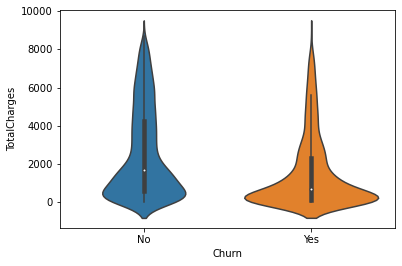

In [74]:
plt.xlabel('Churn')
plt.ylabel('TotalCharges')
sns.violinplot(x = 'Churn', y = 'TotalCharges', data = df)
plt.show()

*The total charges mostly lies nearby 500 dollars who are switching to another service provider.*

### Feature Engineering

#### Filling null values

As we have already seen TotalCharges column contains some null values so we will fill them.

In [79]:
# as the column contains continuous data so we will fill that from mean
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [80]:
# checking is null values are filled
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

*Here we can see all null values are filled.*

#### Encoding

As the dataframe contains most of the object data type column so encoding them.

In [82]:
# importing required library
# we will use label encoder
from sklearn.preprocessing import LabelEncoder

In [83]:
# making instance of it
le = LabelEncoder()

In [85]:
# making a list of all columns which contains categorical data
# we will use list concatenation
cat = [i for i in df.columns if df[i].dtype == 'O']

In [87]:
# using for loop to encode the data of columns
for i in cat:
    df[i] = le.fit_transform(df[i])

In [96]:
# checking top 5 rows of dataframe
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,29.85,29.85,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,56.95,1889.50,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,53.85,108.15,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,42.30,1840.75,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,70.70,151.65,1


*Here we can see the data is encoded*

#### Dropping column

As we know customerID column does not provide any insights to the data so dropping that.

In [98]:
df.drop('customerID', axis = 1, inplace = True)

#### Outliers

Checking for outliers if any

In [102]:
# importing required library to calculate zscore
from scipy.stats import zscore

In [103]:
# finding zscore values of every data and storing it into a variable
z = np.abs(zscore(df))

In [104]:
# checking the data which zscore value is greater than 3
threshold = 3
out = np.where(z>threshold)

In [106]:
# holding array in a dataframe
outlier = pd.DataFrame(out)

# checking shape of outliers data
outlier.shape[1]

682

In [111]:
# Data loss
d_loss = ((7043-6361)/7043)*100
d_loss

9.683373562402386

*As out dataset is not quite big and the data loss is more than 9% so we will not remove the outliers because it may bias the model.*

#### Over sampling

*As we have already seen that our target column contains more than 70% data of a single class so we need to balance the dataset otherwise the model will be more biased towards the one class.*

In [112]:
# we will balance the dataset by doing over sampling
# importing required library
from imblearn.over_sampling import SMOTE

# making instance of it
smt = SMOTE()

In [113]:
# now first we will take input and target column and hold them in x and y variables respectively
x = df.iloc[ : , :-1]
y = df.iloc[ : , -1]

In [116]:
# checking shape of input and target data shape
print('Input data shape:', x.shape)
print('Target data shape:', y.shape)

Input data shape: (7043, 19)
Target data shape: (7043,)


In [117]:
# sending data for balancing
in_x, out_y = smt.fit_resample(x,y)

In [118]:
# now checking shape of new balanced data
print('Input data shape:', in_x.shape)
print('Target data shape:', out_y.shape)

Input data shape: (10348, 19)
Target data shape: (10348,)


*Here we can see now the number of rows increases as there are some synthetic rows created to balance the dataset.*

In [119]:
# checking total number of values of different features of target column
out_y.value_counts()

0    5174
1    5174
Name: Churn, dtype: int64

*Here we can also see the total number of different variables are now same in the target column.*

#### Skewness

In [120]:
# checking skewness of input data
in_x.skew().sort_values(ascending = False)

SeniorCitizen       2.132887
Dependents          1.387537
Contract            1.160551
TotalCharges        1.126194
OnlineSecurity      0.822103
TechSupport         0.797480
tenure              0.518499
Partner             0.504785
OnlineBackup        0.497313
DeviceProtection    0.488941
gender              0.285870
InternetService     0.212533
MultipleLines       0.192308
StreamingTV         0.168360
StreamingMovies     0.151805
PaymentMethod      -0.206007
PaperlessBilling   -0.365088
MonthlyCharges     -0.412214
PhoneService       -2.608869
dtype: float64

*The continuous data column have high skewness.*

In [121]:
# importing library to handle the distribution of data
from sklearn.preprocessing import PowerTransformer

In [122]:
# holding it into an instance
pt = PowerTransformer()

In [123]:
# passing input data to transform and holding the output into a variable
x1 = pt.fit_transform(in_x)

# as we know this will provide the output in numpy array format so making dataframe of it
x_in = pd.DataFrame(x1, columns = in_x.columns)

In [127]:
# checking skewness of new dataframe
x_in.skew()

gender              0.285870
SeniorCitizen       2.132887
Partner             0.504785
Dependents          1.387537
tenure             -0.158529
PhoneService       -2.608869
MultipleLines       0.062681
InternetService    -0.074513
OnlineSecurity      0.454190
OnlineBackup        0.211957
DeviceProtection    0.206378
TechSupport         0.432469
StreamingTV        -0.002230
StreamingMovies    -0.015103
Contract            0.774263
PaperlessBilling   -0.365088
PaymentMethod      -0.192196
MonthlyCharges     -0.301295
TotalCharges       -0.123400
dtype: float64

#### Scaling of data

In [128]:
# we will use standard scaler to scale our data

# importing require library
from sklearn.preprocessing import StandardScaler

# holding it into an instance
ssc = StandardScaler()

In [129]:
# applying scaling to input data
scaled = ssc.fit_transform(x_in)

# this will give output in numpy array format 

# making pandas dataframe of output
input_x = pd.DataFrame(scaled, columns = x_in.columns)

*Now our data is ready to go for model training.*

### Model Building

As we know our target column contains two unique variables so it is binary class classification problem.

In [130]:
# importing classification algorithms and validation matrics

from sklearn.model_selection import train_test_split   # to split the data for training and testing

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [131]:
# making instance of every model
lo_reg = LogisticRegression()
svc = SVC()
dtc = DecisionTreeClassifier()
knn = KNeighborsClassifier()
rfc = RandomForestClassifier()
gnb = GaussianNB()

#### Random State

In [132]:
# first we will find the best random state to split our data

max_acc = 0
# making a variable max_acc and initialising it with 0 we will store the maximum accuracy in it
best_rs = 0
# making a variable best_rs and initialising it with 0 we will store the best random state in it for which maximum accuracy is 
# achieved

# using a for loop to split data into 100 different random states
for i in range(1,101):
    x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = i )
    # taking 25% data for testing
    
    # training Logistic Regression model
    lo_reg.fit(x_train, y_train)
    
    # making prediction on test data
    pred = lo_reg.predict(x_test)
    
    # checking accuracy
    accuracy = accuracy_score(pred, y_test)
    
    print('At random state', i, 'accuracy score is', accuracy)
    
    
    # using if condition to store the best accuracy and random state
    if accuracy>max_acc:
        max_acc = accuracy
        best_rs = i
    
print('Maximum accuracy is', max_acc,'and best random state is', best_rs)

At random state 1 accuracy score is 0.7908774642442984
At random state 2 accuracy score is 0.793196752995748
At random state 3 accuracy score is 0.7947429454967143
At random state 4 accuracy score is 0.7955160417471975
At random state 5 accuracy score is 0.79126401236954
At random state 6 accuracy score is 0.799768071124855
At random state 7 accuracy score is 0.7947429454967143
At random state 8 accuracy score is 0.7877850792423656
At random state 9 accuracy score is 0.7974487823734054
At random state 10 accuracy score is 0.8032470042520293
At random state 11 accuracy score is 0.8024739080015462
At random state 12 accuracy score is 0.8001546192500967
At random state 13 accuracy score is 0.7955160417471975
At random state 14 accuracy score is 0.7935833011209895
At random state 15 accuracy score is 0.7893312717433321
At random state 16 accuracy score is 0.7866254348666409
At random state 17 accuracy score is 0.8005411673753382
At random state 18 accuracy score is 0.7989949748743719
At ra

*Here we can see at random state 92 the best accuracy of model is achieved which is showing 81% accuracy so now we will use this random state to split the data.*

#### Data Splitting

In [133]:
# splitting the data at random state 92
x_train, x_test, y_train, y_test = train_test_split(input_x, out_y, test_size = 0.25, random_state = 92)

# taking 25% of data for testing

In [134]:
# checking testing and training data shape
print('Input training data shape:', x_train.shape)
print('Target training data shape:', y_train.shape)
print('Input test data shape:', x_test.shape)
print('Target test data shape:', y_test.shape)

Input training data shape: (7761, 19)
Target training data shape: (7761,)
Input test data shape: (2587, 19)
Target test data shape: (2587,)


#### Selecting a model

In [135]:
# Now we will train different classification models and check the accuracy score of all models then select the best model

# making a list of all models
model = [lo_reg, svc, dtc, knn, rfc, gnb]

# using for loop to train all models

for model in model:
    model.fit(x_train, y_train)
    
    # making predictions
    pred = model.predict(x_test)
    
    # checking accuracy score
    accuracy = accuracy_score(pred, y_test)
    
    # confusion matrix
    cnf_matrix = confusion_matrix(pred, y_test)
    
    # classification report
    clf_report = classification_report(pred, y_test)
    
    print('Evaluation of model', model,':')
    print('Accuracy score:', accuracy)
    print('Confusion matrix:\n', cnf_matrix)
    print('Classification report\n', clf_report)
    print('\n\n')

Evaluation of model LogisticRegression() :
Accuracy score: 0.8152299961345187
Confusion matrix:
 [[1046  201]
 [ 277 1063]]
Classification report
               precision    recall  f1-score   support

           0       0.79      0.84      0.81      1247
           1       0.84      0.79      0.82      1340

    accuracy                           0.82      2587
   macro avg       0.82      0.82      0.82      2587
weighted avg       0.82      0.82      0.82      2587




Evaluation of model SVC() :
Accuracy score: 0.8310784692694241
Confusion matrix:
 [[1056  170]
 [ 267 1094]]
Classification report
               precision    recall  f1-score   support

           0       0.80      0.86      0.83      1226
           1       0.87      0.80      0.83      1361

    accuracy                           0.83      2587
   macro avg       0.83      0.83      0.83      2587
weighted avg       0.83      0.83      0.83      2587




Evaluation of model DecisionTreeClassifier() :
Accuracy score

*Here we can see all models are working good but RandomForest is working very well it is giving highest accuracy over all models so we will finalize this model and train this.*

#### Final Model Training

In [136]:
# sending data to the best model for training
rfc.fit(x_train, y_train)

RandomForestClassifier()

In [137]:
# making predictions on test data
pred = rfc.predict(x_test)

In [138]:
# checking accuracy score
print('Accuracy score:', accuracy_score(pred, y_test))

Accuracy score: 0.8527251642829532


*Maximum accuracy is 85%*

In [139]:
# checking confusion matrix
print('Confusion matrix:\n', confusion_matrix(pred, y_test))

Confusion matrix:
 [[1135  193]
 [ 188 1071]]


*The predictions are quite well as it is predicting most of the data correctly.*

In [140]:
# checking cassification report
print('Classification report:\n', classification_report(pred, y_test))

Classification report:
               precision    recall  f1-score   support

           0       0.86      0.85      0.86      1328
           1       0.85      0.85      0.85      1259

    accuracy                           0.85      2587
   macro avg       0.85      0.85      0.85      2587
weighted avg       0.85      0.85      0.85      2587



*Overall model accuracy is 85%.*

### Model Evaluation

#### Cross Validation

In [141]:
# importing required model
from sklearn.model_selection import cross_val_score

In [142]:
# using for loop to split data at different cross folds
for i in range(2,15):
    score = cross_val_score(rfc, input_x, out_y, cv = i )
    mean_score = score.mean()
    print('At cross fold', i,'mean score is', mean_score)

At cross fold 2 mean score is 0.8069192114418244
At cross fold 3 mean score is 0.8241323466999466
At cross fold 4 mean score is 0.835427135678392
At cross fold 5 mean score is 0.8394012370325228
At cross fold 6 mean score is 0.8398847192799579
At cross fold 7 mean score is 0.8458834796108727
At cross fold 8 mean score is 0.8469479129685347
At cross fold 9 mean score is 0.847422879798859
At cross fold 10 mean score is 0.8467467459049327
At cross fold 11 mean score is 0.8479128339948653
At cross fold 12 mean score is 0.8504451503281331
At cross fold 13 mean score is 0.8507924236567453
At cross fold 14 mean score is 0.8472353853950605


*Here we can see that there is not much difference between the mean score and accuracy of model at different cross folds that means we can say that our model is neither underfitting nor overfitting.

#### Hyperparameter Tuning

Let's do hyperparameter tuning to check whether the performance of model increases.

In [143]:
# importing required library
from sklearn.model_selection import GridSearchCV

In [144]:
# making a dictionary of parameters
params = {'n_estimators':[100,200,300,400,500], 'criterion': ['gini', 'entropy'], 'max_features': ['sqrt', 'log2']}

# making instance for tuning and passing model and parameters
gsv = GridSearchCV(rfc, params)

In [145]:
# sending data for training at different parameters
gsv.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_features': ['sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]})

In [146]:
# finding best parameter and that accuracy
print('Best Parameter:', gsv.best_params_)
print('Best score:', gsv.best_score_)

Best Parameter: {'criterion': 'entropy', 'max_features': 'sqrt', 'n_estimators': 500}
Best score: 0.8443504756341236


*Here we can see at best parameters the best accuracy of model is 84% while the model itself giving 85% accuracy.*

#### AUC_ROC Curve

In [147]:
# importing required libraries for it
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

In [148]:
# using predict_proba function for model RandomForestClassifier to predict the occurance of 1
y_pred_prob = rfc.predict_proba(x_test)[:,1]

In [149]:
# now we will use these predicted probability to find fpr (false positive rate), tpr (True Positive rate) and threshold values

fpr, tpr, threshold = roc_curve(y_test, y_pred_prob)

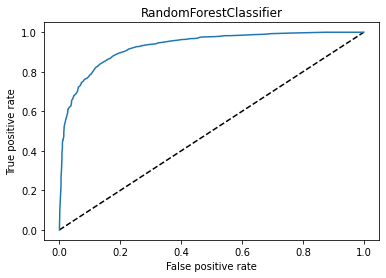

In [150]:
# making auc_roc curve
plt.plot([0,1],[0,1], 'k--')
plt.plot(fpr,tpr)
plt.title('RandomForestClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

In [151]:
# checking roc_score
score = roc_auc_score(y_test, rfc.predict(x_test))
score

0.8526044208119253

*The shape of curve is acceptable because the accuracy of model is 85%.*

### Saving the best model

In [152]:
# importing library
import joblib

In [153]:
joblib.dump(rfc, 'customer_churn_analysis.obj')

['customer_churn_analysis.obj']

### Loading model

In [154]:
churn_analysis = joblib.load('customer_churn_analysis.obj')

In [155]:
# making prediction on test data
pred = churn_analysis.predict(x_test)

In [156]:
accuracy = accuracy_score(pred, y_test)
accuracy

0.8527251642829532

In [157]:
# making dataframe of predictions
pd.DataFrame([churn_analysis.predict(x_test)[:], y_test[:]],index = ['Predicted', 'Original'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171,172,173,174,175,176,177,178,179,180,181,182,183,184,185,186,187,188,189,190,191,192,193,194,195,196,197,198,199,200,201,202,203,204,205,206,207,208,209,210,211,212,213,214,215,216,217,218,219,220,221,222,223,224,225,226,227,228,229,230,231,232,233,234,235,236,237,238,239,240,241,242,243,244,245,246,247,248,249,250,251,252,253,254,255,256,257,258,259,260,261,262,263,264,265,266,267,268,269,270,271,272,273,274,275,276,277,278,279,280,281,282,283,284,285,286,287,288,289,290,291,292,293,294,295,296,297,298,299,300,301,302,303,304,305,306,307,308,309,310,311,312,313,314,315,316,317,318,319,320,321,322,323,324,325,326,327,328,329,330,331,332,333,334,335,336,337,338,339,340,341,342,343,344,345,346,347,348,349,350,351,352,353,354,355,356,357,358,359,360,361,362,363,364,365,366,367,368,369,370,371,372,373,374,375,376,377,378,379,380,381,382,383,384,385,386,387,388,389,390,391,392,393,394,395,396,397,398,399,400,401,402,403,404,405,406,407,408,409,410,411,412,413,414,415,416,417,418,419,420,421,422,423,424,425,426,427,428,429,430,431,432,433,434,435,436,437,438,439,440,441,442,443,444,445,446,447,448,449,450,451,452,453,454,455,456,457,458,459,460,461,462,463,464,465,466,467,468,469,470,471,472,473,474,475,476,477,478,479,480,481,482,483,484,485,486,487,488,489,490,491,492,493,494,495,496,497,498,499,500,501,502,503,504,505,506,507,508,509,510,511,512,513,514,515,516,517,518,519,520,521,522,523,524,525,526,527,528,529,530,531,532,533,534,535,536,537,538,539,540,541,542,543,544,545,546,547,548,549,550,551,552,553,554,555,556,557,558,559,560,561,562,563,564,565,566,567,568,569,570,571,572,573,574,575,576,577,578,579,580,581,582,583,584,585,586,587,588,589,590,591,592,593,594,595,596,597,598,599,600,601,602,603,604,605,606,607,608,609,610,611,612,613,614,615,616,617,618,619,620,621,622,623,624,625,626,627,628,629,630,631,632,633,634,635,636,637,638,639,640,641,642,643,644,645,646,647,648,649,650,651,652,653,654,655,656,657,658,659,660,661,662,663,664,665,666,667,668,669,670,671,672,673,674,675,676,677,678,679,680,681,682,683,684,685,686,687,688,689,690,691,692,693,694,695,696,697,698,699,700,701,702,703,704,705,706,707,708,709,710,711,712,713,714,715,716,717,718,719,720,721,722,723,724,725,726,727,728,729,730,731,732,733,734,735,736,737,738,739,740,741,742,743,744,745,746,747,748,749,750,751,752,753,754,755,756,757,758,759,760,761,762,763,764,765,766,767,768,769,770,771,772,773,774,775,776,777,778,779,780,781,782,783,784,785,786,787,788,789,790,791,792,793,794,795,796,797,798,799,800,801,802,803,804,805,806,807,808,809,810,811,812,813,814,815,816,817,818,819,820,821,822,823,824,825,826,827,828,829,830,831,832,833,834,835,836,837,838,839,840,841,842,843,844,845,846,847,848,849,850,851,852,853,854,855,856,857,858,859,860,861,862,863,864,865,866,867,868,869,870,871,872,873,874,875,876,877,878,879,880,881,882,883,884,885,886,887,888,889,890,891,892,893,894,895,896,897,898,899,900,901,902,903,904,905,906,907,908,909,910,911,912,913,914,915,916,917,918,919,920,921,922,923,924,925,926,927,928,929,930,931,932,933,934,935,936,937,938,939,940,941,942,943,944,945,946,947,948,949,950,951,952,953,954,955,956,957,958,959,960,961,962,963,964,965,966,967,968,969,970,971,972,973,974,975,976,977,978,979,980,981,982,983,984,985,986,987,988,989,990,991,992,993,994,995,996,997,998,999,1000,1001,1002,1003,1004,1005,1006,1007,1008,1009,1010,1011,1012,1013,1014,1015,1016,1017,1018,1019,1020,1021

*Here we can see the model is making predictions quite good somewhere it is making wrong predictions it is known because the model accuracy is 85%.*